**Basic Time Series Analysis on Cryptocurrency Historical Prices**

In [1]:
import numpy as np 
import pandas as pd 
import os
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))



In [2]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [3]:
df = pd.read_csv('litecoin_price.csv')
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Aug 07, 2017",45.17,46.48,45.12,45.80,"106,560,000","2,364,540,000"
1,"Aug 06, 2017",46.84,47.30,45.10,45.10,"147,891,000","2,451,490,000"
2,"Aug 05, 2017",43.49,46.92,43.48,46.86,"248,320,000","2,275,090,000"


In [4]:
print (df.describe())


              Open         High          Low        Close
count  1563.000000  1563.000000  1563.000000  1563.000000
mean      7.621152     7.969181     7.255253     7.644939
std       9.664624    10.234897     9.015136     9.706822
min       1.150000     1.340000     1.110000     1.160000
25%       3.030000     3.110000     2.945000     3.030000
50%       3.820000     3.860000     3.770000     3.820000
75%       7.080000     7.330000     6.655000     7.145000
max      55.270000    56.030000    50.600000    55.330000


In [5]:
print (df.dtypes)

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object


In [6]:
df1 = df[['Date','Close']]
df1.head(3)

,Date,Close
0,"Aug 07, 2017",45.80
1,"Aug 06, 2017",45.10
2,"Aug 05, 2017",46.86


In [7]:
# Setting the Date as Index
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print (df_ts.tail(3))

<class 'pandas.core.frame.DataFrame'>
              Close
Date               
Apr 01, 2014  13.13
Apr 01, 2015   1.66
Apr 01, 2016   3.24
              Close
Date               
Sep 30, 2014   4.47
Sep 30, 2015   3.01
Sep 30, 2016   3.84


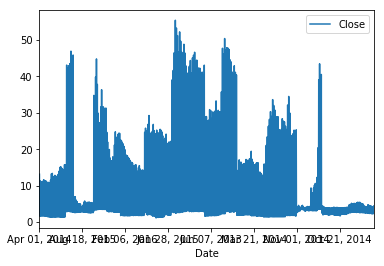

In [8]:
#plot
df_ts.plot()

In [9]:
# Dickey Fuller Test Function
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
       
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

In [10]:
# Stationarity with Dickey Fuller Test 
# Convert the DF to series first
ts = df_ts['Close']
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                   -2.922049
p-value                           0.042843
#lags Used                       23.000000
Number of Observations Used    1539.000000
Critical Value (1%)              -3.434606
Critical Value (5%)              -2.863420
Critical Value (10%)             -2.567771
dtype: float64


**Conclusion??**

The Test Statistics value is Much higher than critical value. So we can't reject the Null Hypothesis.

Hence from the plot the Time series is Non-Stationary

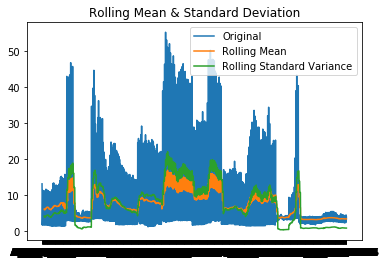

In [11]:
# plot the 12-Month Moving Rolling Mean, Variance 
# Rolling Statistics
rolmean = ts.rolling(window=12).mean()
rolvar = ts.rolling(window=12).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)